AST 5151 
PS2 - Math Module
Cesarine Graham

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

### Problem 1 ###

This is our real, continuous Fourier transform:
$$
F(f) = 4\delta(f-2) + 2\delta(f-4)
$$

From this, we can get the following information:
* **Frequency domain:** the Fourier transform is just two impulses (our delta functions) at $f=2$ and $f=4$, with amplitudes 4 and 2.
* **Time domain:** the inverse Fourier transform gives you cosines:
$$
f(t) = 4 \cos(2 \pi \cdot 2 \, t) + 2 \cos(2 \pi \cdot 4 \, t)
$$

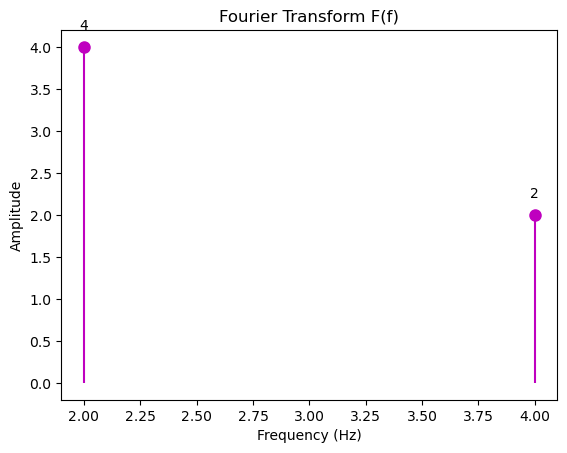

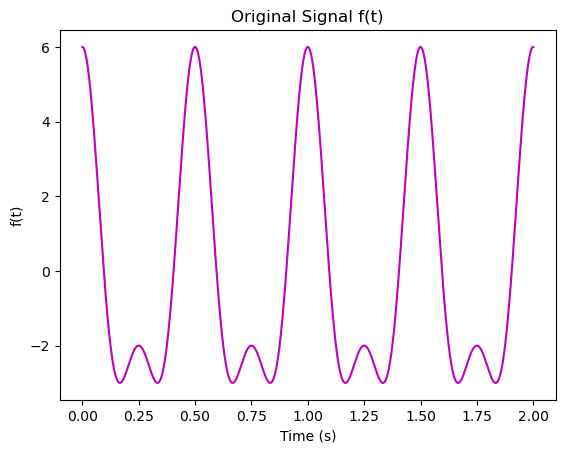

In [2]:
freqs = [2, 4] # locations of deltas
amps  = [4, 2] # amplitudes

# plotting delta functions (frequencies)
plt.figure()
plt.plot(freqs, amps, 'mo', markersize=8)    # plotting the frequencies as points
for f, a in zip(freqs, amps):                # looping through freqs and amps at the same time
    plt.vlines(f, 0, a, color='m')           # vertical lines like deltas
    plt.text(f, a+0.2, str(a), ha='center')  # amplitude number written next to the delta function
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier Transform F(f)")
plt.show()

# time domain inverse transfrom
t = np.linspace(0, 2, 1000)  # 2 seconds, 1000 samples
f_t = 4*np.cos(2*pi*2*t) + 2*np.cos(2*pi*4*t)

#plotting inverse transform
plt.figure()
plt.plot(t, f_t, color='m')
plt.xlabel("Time (s)")
plt.ylabel("f(t)")
plt.title("Original Signal f(t)")
plt.show()

### Problem 2 ###

We want the Fourier transform of the given frequencies and amplitudes. 

A note with these harmonics is a sum of sinusoids at these frequencies. The time-domain signal can be written as:

$$
f(t) = 1 \cdot \cos(2\pi f t) + 0.3 \cdot \cos(2\pi (2f) t) + 1.2 \cdot \cos(2\pi (5f) t) + 0.3 \cdot \cos(2\pi (7f) t)
$$
$$
f(t) = 1 \cos(2\pi f t) + 0.3 \cos(2\pi \cdot 2f t) + 1.2 \cos(2\pi \cdot 5f t) + 0.3 \cos(2\pi \cdot 7f t)
$$

The Fourier transform of $\cos(2\pi f_0 t)$ is:

$$
\mathcal{F}\{\cos(2\pi f_0 t)\} = \frac{1}{2} \left[ \delta(f - f_0) + \delta(f + f_0) \right]
$$

Where each cosine contributes two delta functions at $+f_k$ and $-f_k$, scaled by half its amplitude.

Using the formula above, the Fourier transform $F(f)$ is:

$$
\begin{aligned}
F(f) = &\frac{1}{2} \cdot 1 \left[ \delta(f - f) + \delta(f + f) \right] \\
&+ \frac{1}{2} \cdot 0.3 \left[ \delta(f - 2f) + \delta(f + 2f) \right] \\
&+ \frac{1}{2} \cdot 1.2 \left[ \delta(f - 5f) + \delta(f + 5f) \right] \\
&+ \frac{1}{2} \cdot 0.3 \left[ \delta(f - 7f) + \delta(f + 7f) \right]
\end{aligned}
$$


### Problem 3 [Extra Credit] ###

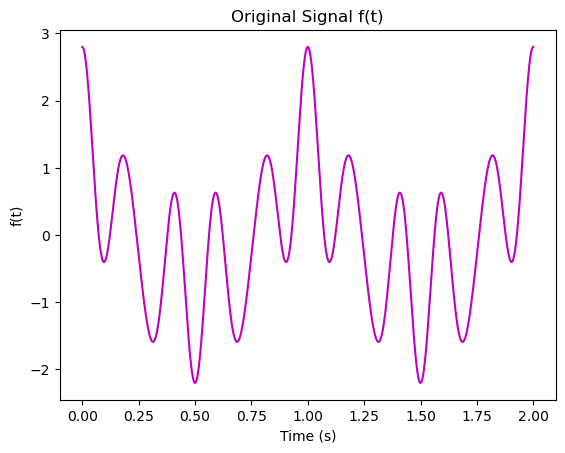

In [4]:
# we will assume the fundamental frequency is 1
freqs = [1, 2, 5, 7] # locations of deltas
amps  = [1, 0.3, 1.2, 0.3] # amplitudes

# time domain inverse transfrom
t = np.linspace(0, 2, 1000)  # 2 seconds, 1000 samples
f_t = np.cos(2*pi*t) + 0.3*np.cos(2*pi*2*t) + 1.2*np.cos(2*pi*5*t) + 0.3*np.cos(2*pi*7*t)

#plotting inverse transform
plt.figure()
plt.plot(t, f_t, color='m')
plt.xlabel("Time (s)")
plt.ylabel("f(t)")
plt.title("Original Signal f(t)")
plt.show()

### Problem 4 ###


**(a) An audio engineer’s iPad app**

Method: Digitize the signal + Fourier transform
<br>
The iPad records sound and computes the Fourier transform to display the spectrum.
<br>
Physical steps:
1. The microphone in the iPad converts the recorded sound waves into analog voltage.
2. Analog-to-digital converter samples the signal at regular intervals.
3. FFT computes the amplitudes at different frequencies.
4. Spectrum is displayed visually for the audio engineer.



**(b) Your ear**

Method: Sympathetic resonators
<br>
The cochlea in your ear acts like a bunch of resonators where different parts respond to different frequencies.
<br>
Physical steps:
1. Sound waves enter the ear canal, vibrating the eardrum accordingly.
2. The vibrations transmitted via many small bones in your ear to the cochlea, which are many small hairs (gross!).
3. The cochlea resonate with different frequencies.
4. The cochlea hair cells convert mechanical vibrations into nerve signals.
5. Your brain interprets nerve signals as frequencies- thus you can hear!



**(c) An astronomical spectrograph**

Method: Dispersion
<br>
Diffraction grating within a spectrograph separates sampled light into wavelengths.
<br>
Physical steps:
1. Sampled light enters telescope, into a metal plate with a small slit.
2. Light is bounced off a diffraction grating, which splits the light into its different wavelengths.
3. A CCD records the intensity of the different wavlengths at each according angle, giving the spectrum.


### Problem 5 ###

Since the signal is aperiodic, our best approach is to use the the Discrete Fourier Transform (DFT). To do so, we would perform the following steps:





## Note:


1. To find the complex coefficients $c_n$, we need to integrate the product of the signal $V(t)$ and the complex exponential $e^{-in\omega_0t}$ over one period $T_0$.

2. $$c_n = \dfrac{1}{T_0}\int_{0}^{T_0} V(t) e^{-in\omega_0t} dt$$

3. After performing the integral, we obtain the expression for the complex coefficient $c_n$:

$$c_n = \frac{V_0}{n\pi}\left(1 - (-1)^n\right)$$

4. To represent $V(t)$ in terms of the complex coefficients, we can use the following expression:

$$V(t) = \sum_{n=-\infty}^{\infty} c_n e^{in\omega_0t}$$
$$V(t) = \frac{V_0}{2} + \sum_{n=1}^{\infty} \frac{V_0}{n\pi}\left(1 - (-1)^n\right)\sin(n\omega_0t) + \frac{V_0}{\pi}\cos(\omega_0t)$$

This representation accounts for both the real and imaginary parts of the complex exponentials and accurately represents the square wave signal using complex numbers.